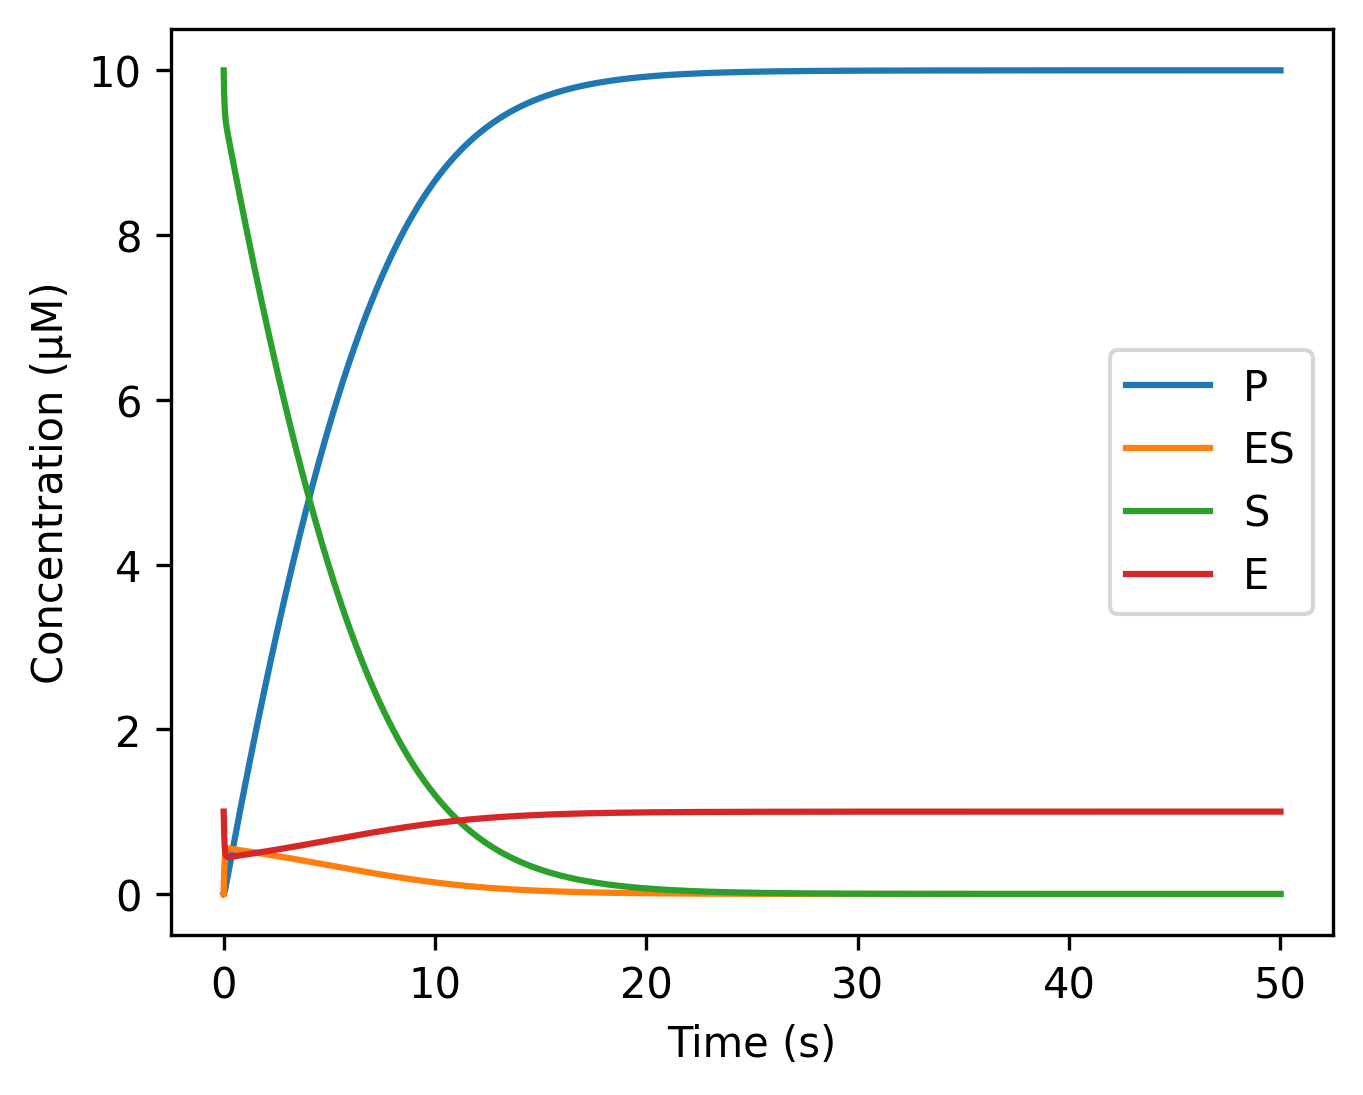

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Set initial conditions
E_0 = 1  # μM
S_0 = 10  # μM
ES_0 = 0  # μM
P_0 = 0  # μM

k1 = 100 / 60  # /s
k2 = 600 / 60  # /s
k3 = 150 / 60  # /s

# Set up the time array
N = 50000
t0 = 0
t_end = 50
t = np.linspace(t0, t_end, N)
dt = t[1] - t[0]


# Initialize the solution array
y = np.zeros((N, 4))
y[0] = [E_0, S_0, ES_0, P_0]

dp_list = [0]

# Define the derivative function
def f(t, y):
    E, S, ES, P = y
    dE = -k1 * E * S + k2 * ES + k3 * ES
    dS = -k1 * E * S + k2 * ES
    dES = k1 * E * S - k2 * ES - k3 * ES
    dP = k3 * ES
    return np.array([dE, dS, dES, dP])

# Use the fourth-order Runge-Kutta method to solve the differential equations
for i in range(N - 1):
    k1_ = f(t[i], y[i])
    k2_ = f(dt/2 + t[i], y[i] + dt/2 * k1_)
    k3_ = f(dt/2 + t[i], y[i] + dt/2 * k2_)
    k4_ = f(dt + t[i], y[i] + dt * k3_)
    y[i + 1] = y[i] + dt/6 *(k1_ + 2*k2_ + 2*k3_ + k4_) 
    dp_list.append(k3 * y[i + 1][2])

# Plot the results for 8.2

# Set dpi and image size
fig = plt.figure(figsize=(5, 4), dpi=300)

plt.plot(t, y[:, 3], label='P') # 'Product'
plt.plot(t, y[:, 2], label='ES') # 'Intermediate'
plt.plot(t, y[:, 1], label='S') # 'Substrate'
plt.plot(t, y[:, 0], label='E') # 'Enzyme'

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration (μM)')
plt.show()

# Save the image in PNG format
fig.savefig('result1.png', dpi=300, bbox_inches='tight')









In [12]:
print("The Final Concentration (μM) of P is: " + str(y[:, 3][-1]) + ' μM')
print("The Final Concentration (μM) of ES is: " + str(y[:, 2][-1]) + ' μM')
print("The Final Concentration (μM) of S is: " + str(y[:, 1][-1]) + ' μM')
print("The Final Concentration (μM) of E is: " + str(y[:, 0][-1]) + ' μM')

The Final Concentration (μM) of P is: 9.999990632711981 μM
The Final Concentration (μM) of ES is: 1.1259147027478198e-06 μM
The Final Concentration (μM) of S is: 8.24137334653992e-06 μM
The Final Concentration (μM) of E is: 0.9999988740853092 μM


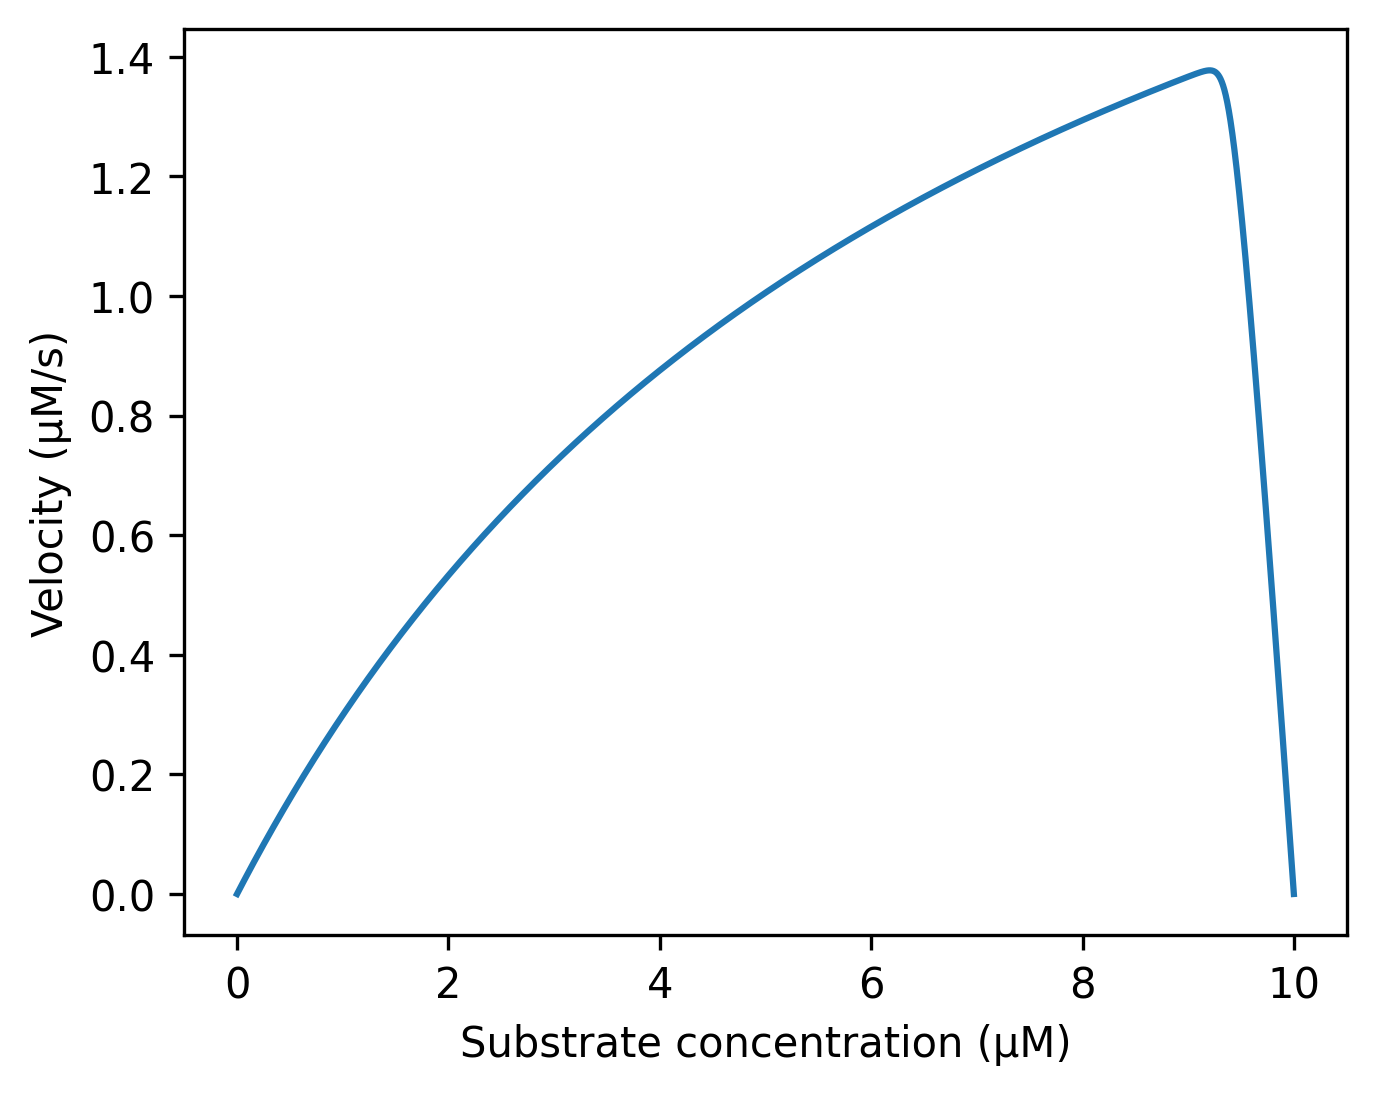

Maximum Velocity: 1.3774644263606182 μM/s
When Velocity reaches the maximum value, the value of S is: 9.203310016020918 μM


In [13]:
# Plot the results for 8.3

# Set dpi and image size
fig = plt.figure(figsize=(5, 4), dpi=300)

# Plot the velocity as a function of the substrate concentration
plt.plot(list(y[:, 1]), dp_list)
plt.xlabel('Substrate concentration (μM)')
plt.ylabel('Velocity (μM/s)')
plt.show()

# Save the image in PNG format
fig.savefig('result2.png', dpi=300, bbox_inches='tight')


print("Maximum Velocity: " + str(max(dp_list)) + " μM/s")
max_index = dp_list.index(max(dp_list))
s_for_max_v = list(y[:, 1])[max_index]
print("When Velocity reaches the maximum value, the value of S is: " + str(s_for_max_v) + ' μM')
